# Exploratory Analysis - Employee.csv

# Dataset Description 
Data consists of 4653 record with 9 features related to emloyee information.

**The dataset contains the following columns:**
* Education: Employee’s education level (categorical).
* JoiningYear: The year the employee joined the company (numerical).
* City: The city where the employee works (categorical).
* PaymentTier: Employee’s salary tier (1-3) (numerical).
* Age: Employee’s age in years (numerical).
* Gender: Employee’s gender (categorical).
* EverBenched: Whether the employee was ever benched (yes/no) (categorical).
* ExperienceInCurrentDomain: Number of years of experience in the current domain (numerical).
* LeaveOrNot: Binary variable indicating if the employee left the company (1 = left, 0 = stayed) (binary).

There are no missing values in the dataset. The dataset is suitable for analyzing employee retention. payment structure and trends, as well as classification of the possible leavers.

* Histogramy + opis
* Box ploty + opis
* Pair ploty + opis
* Balans klas (dla klasyfikacji)
* Wizualizacje danych w oparciu o jakiś bardziej zaawansowany wykres (przykład z wykładu)
* Analizę danych bazując na pandas, czyli np. w jakim kraju wystąpiła najwyższa inflacja, w jakim kraju najcześciej pojawił się kryzys itp (oczywiście każdy zbiór danych będzie inny)
* Analizę pairplotów (jeśli macie Państwo dużo danych można wyrysować mniej - będzie się zlewało na pairplocie, albo np. policzyć współczynniki korelacji Pearsona/Spearmana)
* Proszę zastanowić się nad cechami jakie macie Państwo w zbiorze, tj. czy jakieś należy ze sobą zestawić, podzielić przez siebie etc, co robić z timestamp, co robić z danymi typu string itp.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
DATA_PATH = '../data/raw/Employee.csv'
DIRTY_DATA_PATH = '../data/processed/Employee_with_missing_data.csv'
df = pd.read_csv(DATA_PATH)
dirty_df = pd.read_csv(DIRTY_DATA_PATH)

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,incorrect_value,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,-963,28,Female,No,242,1
2,incorrect_value,748,New Delhi,-155,38,NaN,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,-180,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4445 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4421 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4427 non-null   object
 6   EverBenched                4443 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [52]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,1837.991833,3.376746,28.398453,0.647539,4.201161
std,598.580967,190.602624,178.681819,178.759881,174.785281
min,-994.000000,-998.000000,-999.000000,-998.000000,-999.000000
25%,2013.000000,2.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,33.000000,4.000000,1.000000
max,2018.000000,997.000000,998.000000,990.000000,996.000000


In [53]:
print('___Num of N/As\n',df.isna().sum())
print('___Num of Nulls__\n',df.isnull().any())
print('___Num of unique values___\n', df.nunique())

___Num of N/As
 Education                    208
JoiningYear                    0
City                         232
PaymentTier                    0
Age                            0
Gender                       226
EverBenched                  210
ExperienceInCurrentDomain      0
LeaveOrNot                     0
dtype: int64
___Num of Nulls__
 Education                     True
JoiningYear                  False
City                          True
PaymentTier                  False
Age                          False
Gender                        True
EverBenched                   True
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool
___Num of unique values___
 Education                      4
JoiningYear                  369
City                           4
PaymentTier                  414
Age                          404
Gender                         3
EverBenched                    3
ExperienceInCurrentDomain    423
LeaveOrNot                   377
dty

In [ ]:
print('___Num of N/As\n',dirty_df.isna().sum())
print('___Num of Nulls__\n',dirty_df.isnull().any())
print('___Num of unique values___\n', dirty_df.nunique())

In [54]:
df = df.drop_duplicates()
df.shape

(4094, 9)

<Figure size 1400x1000 with 0 Axes>

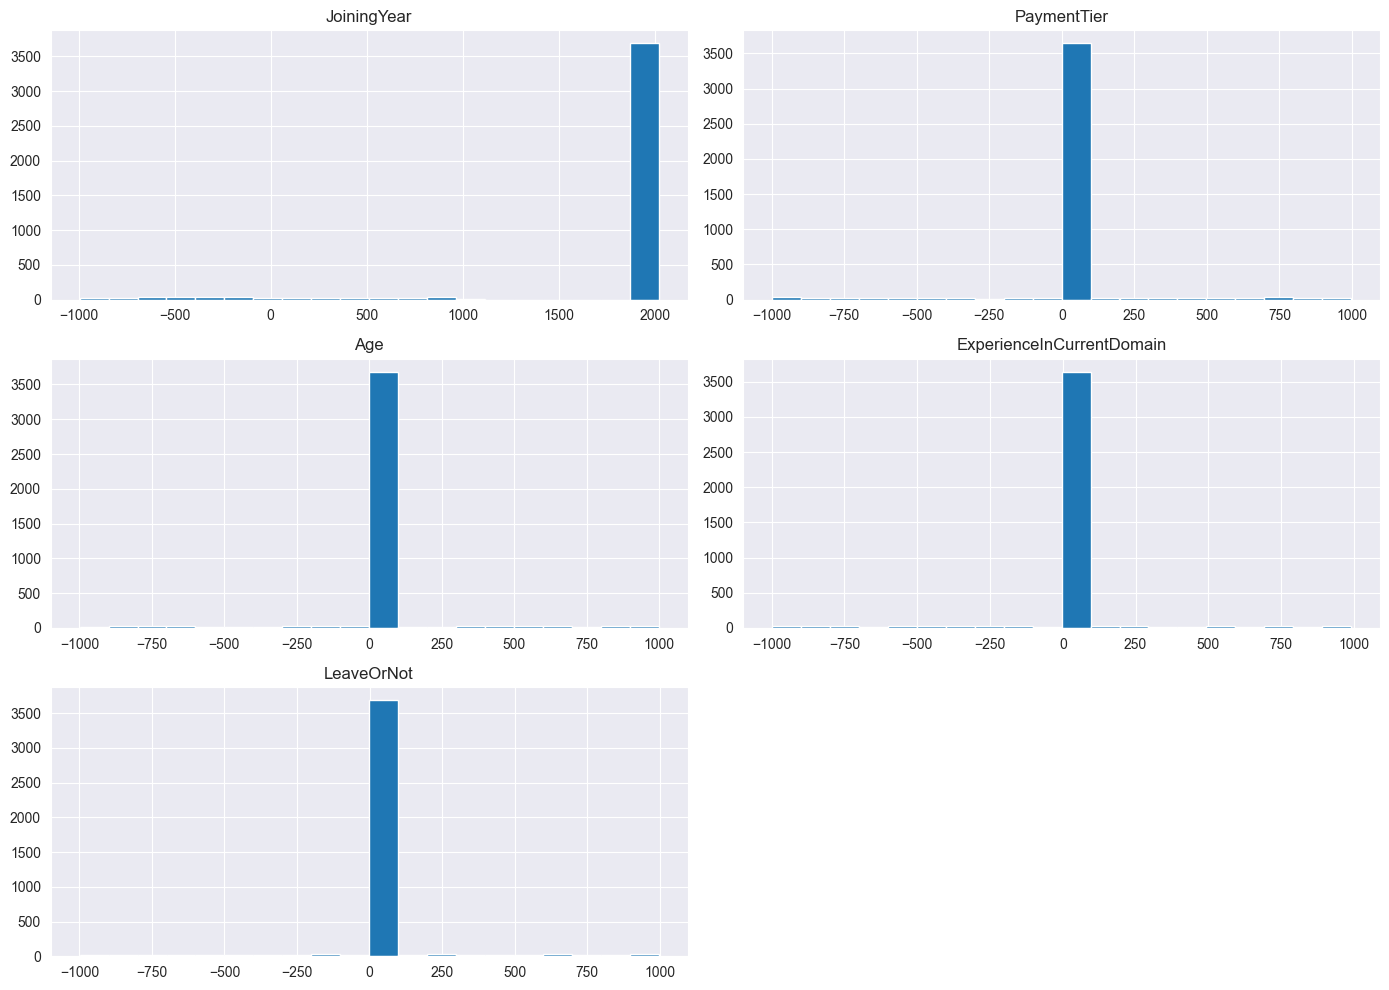

In [55]:
plt.figure(figsize=(14, 10))
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

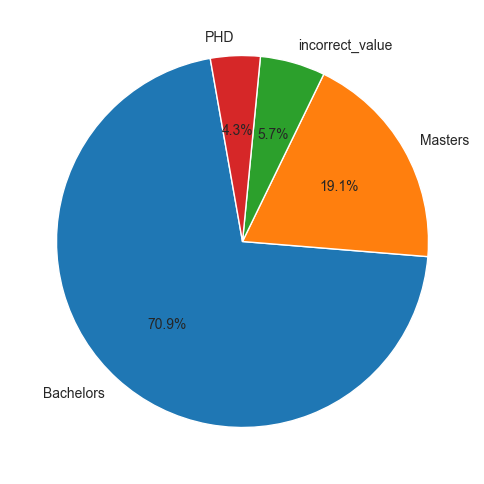

In [56]:
edu_count=df.Education.value_counts()
plt.figure(figsize=(6, 8))
plt.pie(edu_count, labels=edu_count.index, autopct='%1.1f%%', startangle=100)
plt.show()

<Axes: xlabel='JoiningYear', ylabel='count'>

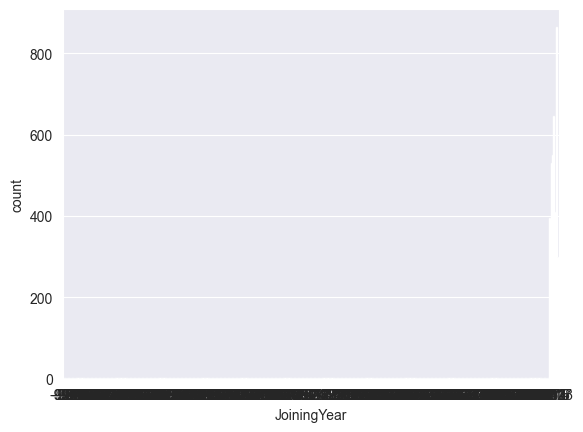

In [57]:
sns.countplot(data=df,x='JoiningYear')

<Axes: xlabel='Education', ylabel='count'>

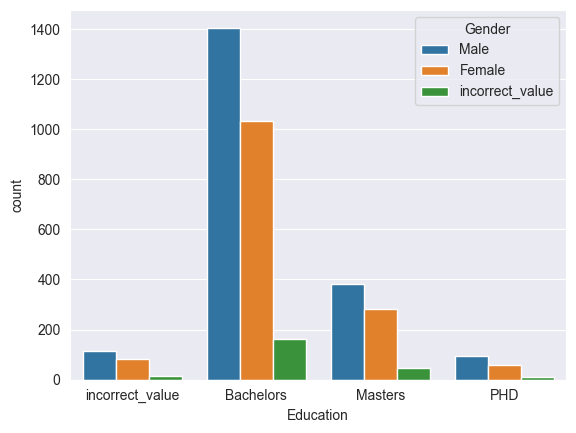

In [58]:
sns.countplot(data=df,x=df.Education,hue='Gender')

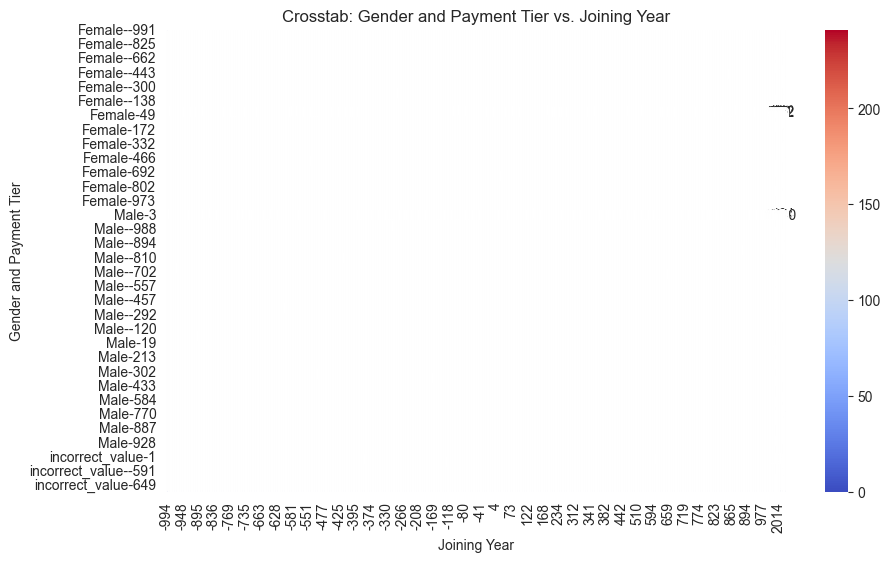

In [59]:
x=pd.crosstab([df.Gender,df.PaymentTier],df.JoiningYear)
plt.figure(figsize=(10, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Joining Year')
plt.ylabel('Gender and Payment Tier')
plt.title('Crosstab: Gender and Payment Tier vs. Joining Year')
plt.show()

<Figure size 1200x800 with 0 Axes>

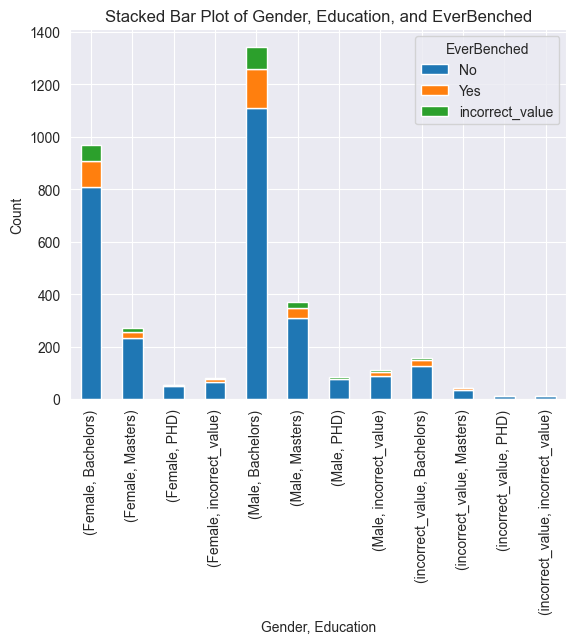

In [60]:
x = pd.crosstab([df['Gender'], df['Education']], df['EverBenched'])

plt.figure(figsize=(12, 8))

x.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender, Education, and EverBenched')
plt.xlabel('Gender, Education')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

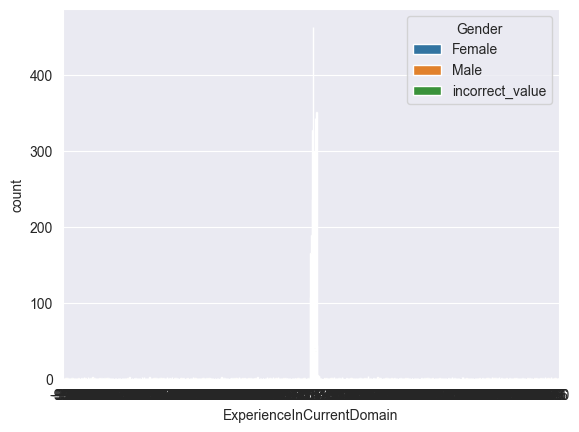

In [61]:
sns.countplot(data=df,x='ExperienceInCurrentDomain',hue='Gender')

Text(0.5, 1.0, 'Employee Turnover by Joining Year')

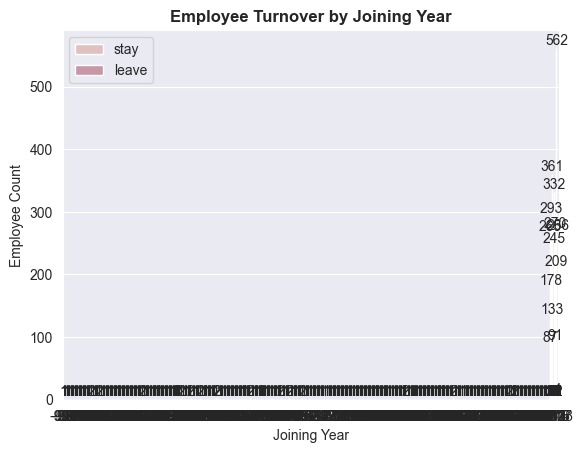

In [62]:
countplot = sns.countplot(x = 'JoiningYear' , hue = 'LeaveOrNot', data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Joining Year")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Joining Year", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Payment Tier')

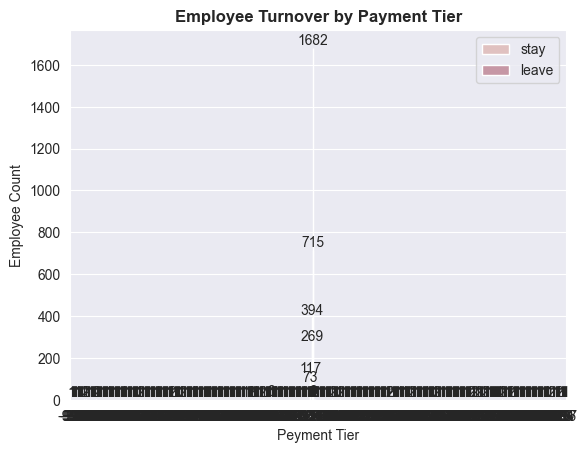

In [63]:
countplot = sns.countplot(x = 'PaymentTier' , hue = 'LeaveOrNot', data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Peyment Tier")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Payment Tier", fontweight = "bold")

Text(0.5, 1.0, 'Employee Turnover by Gender')

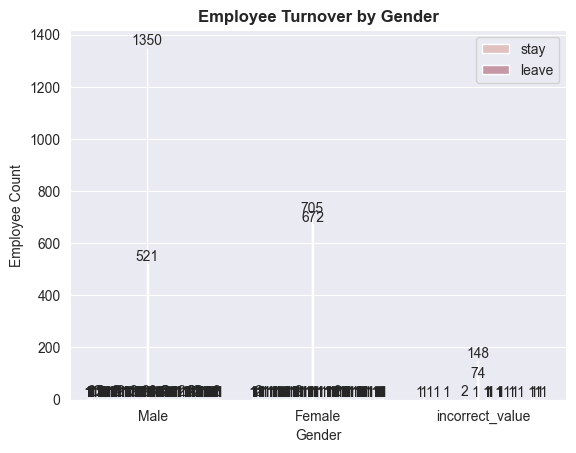

In [64]:
countplot = sns.countplot(x = "Gender", hue = "LeaveOrNot", data = df)
for count in countplot.containers:
    countplot.bar_label(count,)
plt.xlabel("Gender")
plt.ylabel("Employee Count")
plt.legend(labels = ["stay", "leave"])
plt.title("Employee Turnover by Gender", fontweight = "bold")